<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/Tensorflow_Series/Tensorflow_A2Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.1 Install Tensorflow

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

# Download and import the MIT 6.S191 package
!pip install mitdeeplearning
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 2.1MB 4.5MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.1.2-cp36-none-any.whl size=2114585 sha256=dc73f2b63143ccb26a3e89a3244ed529bddb9e4869fdca41576f0d255dfdcf9b
  Stored in directory: /root/.cache/pip/wheels/27/e1/73/5f01c787621d8a3c857f59876c79e304b9b64db9ff5bd61b74
Successfully built mitdeeplearning


In [50]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# 0-d tensors
sport = tf.constant("Tennis", tf.string)
number = tf.constant(3.1432789879, tf.float64)

print (f"'sport' is a {tf.rank(sport).numpy()}-d tensor")
print (f"'number' is a {tf.rank(number).numpy()}-d tensor")

'sport' is a 0-d tensor
'number' is a 0-d tensor


In [4]:
# vectors and list can be used to create 1-d tensors
sports = tf.constant(["Tennis","Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.0998934, 0.0893931], tf.float64)

print (f"'sports' is a {tf.rank(sports).numpy()}-d tensor")
print (f"'numbers' is a {tf.rank(numbers).numpy()}-d tensor")

'sports' is a 1-d tensor
'numbers' is a 1-d tensor


In [9]:
### Defining higher order tensors ###
# 2-d tensors

matrix = tf.constant([[1,2,3],[4,5,6],[7,8,9]], tf.float32)
print (matrix.shape)

assert isinstance(matrix, tf.Tensor)
assert tf.rank(matrix).numpy() == 2

(3, 3)


In [29]:
### Defining higher order tensors ###
# 4-d tensors

matrix = tf.constant(
[
  [
    [
      [1,2,3],
      [4,5,6]
    ],
    [
      [1,2,3],
      [4,5,6]
    ]
  ],
  [
    [
      [1,2,3],
      [4,5,6]
    ],
    [
      [1,2,3],
      [4,5,6]
    ]
  ]
]
)
print (matrix.shape)

assert isinstance(matrix, tf.Tensor)
assert tf.rank(matrix).numpy() == 4

(2, 2, 2, 3)


In [23]:
'''TODO: Define a 4-d Tensor.'''
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3. 
#   You can think of this as 10 images where each image is RGB 256 x 256.
# images = # TODO

images = tf.zeros(shape=(10,256,256,3))
print (images.shape)

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

(10, 256, 256, 3)


In [30]:
# slicing higher rank tensor
row_vector = matrix[1]
row_vector

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]]], dtype=int32)>

In [33]:
# Computations on Tensorflow
a = tf.constant(15)
b = tf.constant(32)

c = tf.add(a,b)
print (c.numpy())

47


In [34]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)
  return e

In [43]:
a, b = 1.5, 2.5
e_out = func(a,b)
print (e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


In [52]:
# Defining a network layer

# n_output_nodes: number of output nodes
# input_shape: shape of the input
# x: input to the layer

class OurDenseLayer(layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weights", shape=[d, self.n_output_nodes])
    self.b = self.add_weight("bias",shape=[1, self.n_output_nodes])

  def call(self, x):
    '''TODO: define the operation for z (hint: use tf.matmul)'''
    z = tf.matmul(x,self.W) + self.b

    '''TODO: define the operation for out (hint: use tf.sigmoid)'''
    y = tf.sigmoid(z)
    return y

In [64]:
# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the outputs
print (y.shape)
print (y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

(1, 3)
[[0.2697859  0.45750412 0.66536945]]
[PASS] test_custom_dense_layer_output


True

In [76]:
# Defining a neural network using a Sequential API

# Import relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of outputs
n_output_nodes = 3

# First define the model
model = Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :) 
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable

dense_layer = Dense(3, activation='sigmoid' ,input_shape=(1,2))

# Add the dense layer to the model
model.add(dense_layer)
print (model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1, 3)              9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


In [77]:
# Test model with example input
x_input = tf.constant([[1,2]], shape=(1,2))

'''TODO: feed input into the model and predict the output!'''
model_output = model(x_input)
print(model_output)

tf.Tensor([[0.19695838 0.6330006  0.7668015 ]], shape=(1, 3), dtype=float32)


In [78]:
# subclassing
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):
  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    '''TODO: Our model consists of a single Dense layer. Define this layer.''' 
    self.dense_layer = Dense(n_output_nodes, activation='sigmoid')

  def call(self, inputs):
    return self.dense_layer(inputs)

In [79]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)
x_input = tf.constant([[1,2]], shape=(1,2))
print (model.call(x_input))

tf.Tensor([[0.9139061  0.3266745  0.83923274]], shape=(1, 3), dtype=float32)


In [80]:
# Gradient computation with Gradient Tape

# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0) 

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x

# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y,x)

assert dy_dx.numpy() == 6.0

Initializing x=[[-0.92759573]]


Text(0, 0.5, 'x value')

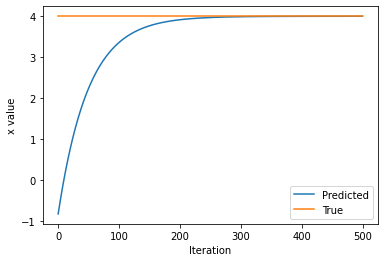

In [88]:
### Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss, 
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss = tf.pow((x-x_f), 2)

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')